In [1051]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import sys
import os
from __future__ import division
plt.rcParams["figure.figsize"] = (20,10)
from itertools import chain
import tqdm as tqdm
from colorthief import ColorThief
import random

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [1052]:
influence_data = pd.read_csv('influence_data.csv')
print(influence_data.shape)
influence_data.tail(5)

(42770, 8)


,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
42765,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010
42766,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010
42767,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010
42768,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010
42769,2896351,Tommy Lee,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010


In [1053]:
influence_data = influence_data
influence_data.tail()

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
42765,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010
42766,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010
42767,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010
42768,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010
42769,2896351,Tommy Lee,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010


In [1025]:
new_data = influence_data.loc[influence_data["influencer_main_genre"]== "Pop/Rock"]
new_data = new_data[:200]

In [1026]:
influence_melted = new_data.melt(
    ['influencer_id','follower_name', 'influencer_main_genre', 'influencer_active_start', 'follower_id', 'follower_main_genre', 'follower_active_start'],
    var_name = 'Type',value_name='Name')

In [1027]:
influence_melted.tail()

,influencer_id,follower_name,influencer_main_genre,influencer_active_start,follower_id,follower_main_genre,follower_active_start,Type,Name
195,114342,Alice Cooper,Pop/Rock,1960,5953,Pop/Rock,1960,influencer_name,The Doors
196,137474,Alice Cooper,Pop/Rock,1960,5953,Pop/Rock,1960,influencer_name,Laura Nyro
197,138699,Alice Cooper,Pop/Rock,1950,5953,Pop/Rock,1960,influencer_name,Frank Zappa
198,182598,Alice Cooper,Pop/Rock,1960,5953,Pop/Rock,1960,influencer_name,MC5
199,311674,Alice Cooper,Pop/Rock,1960,5953,Pop/Rock,1960,influencer_name,Vanilla Fudge


In [1028]:
G = nx.from_pandas_edgelist(influence_melted, 
                            source='follower_name',
                            target='Name',
                            create_using=nx.DiGraph())


In [1029]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 179
Number of edges: 200
Average in degree:   1.1173
Average out degree:   1.1173


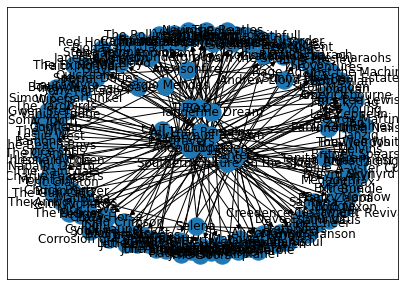

In [1030]:
plt.figure(figsize=(7, 5))
nx.draw_networkx(G)

(array([160.,  10.,   0.,   2.,   1.,   2.,   1.,   1.,   0.,   2.]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <BarContainer object of 10 artists>)

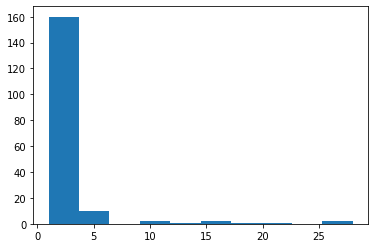

In [1031]:
plt.figure(figsize=(6, 4))
plt.hist([v for k,v in nx.degree(G)])

(array([ 21., 107.,  23.,  20.,   0.,   4.,   3.,   0.,   0.,   1.]),
 array([0.        , 0.00337079, 0.00674157, 0.01011236, 0.01348315,
        0.01685393, 0.02022472, 0.02359551, 0.02696629, 0.03033708,
        0.03370787]),
 <BarContainer object of 10 artists>)

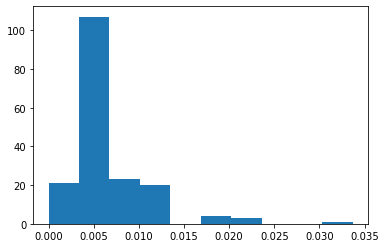

In [1032]:
plt.figure(figsize=(6, 4))
plt.hist(nx.centrality.closeness_centrality(G).values())

In [1033]:
#nx.diameter(G)

In [1034]:
#nx.cluster.average_clustering(G)

In [1035]:
new_data2 = new_data

In [1036]:
new_data2.drop(columns=["influencer_id", "influencer_active_start", "influencer_main_genre", "follower_id", "follower_main_genre", "follower_active_start"])

,influencer_name,follower_name
0,The Exploited,Special Duties
2,Bob Dylan,PJ Harvey
3,Leonard Cohen,PJ Harvey
4,The Gun Club,PJ Harvey
5,Chrissie Hynde,PJ Harvey
...,...,...
288,The Doors,Alice Cooper
289,Laura Nyro,Alice Cooper
290,Frank Zappa,Alice Cooper
291,MC5,Alice Cooper


In [1037]:
N = nx.from_pandas_edgelist(new_data2, source='follower_name', target='influencer_name')

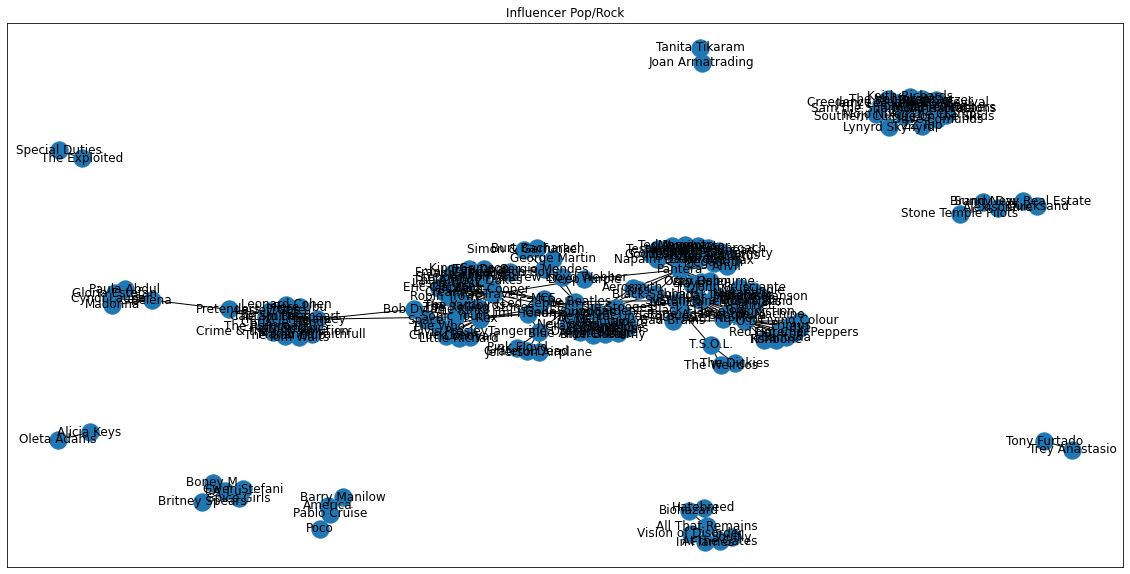

In [1038]:
plt.title("Influencer Pop/Rock")
nx.draw_networkx(N)

(array([160.,  10.,   0.,   2.,   1.,   2.,   1.,   1.,   0.,   2.]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <BarContainer object of 10 artists>)

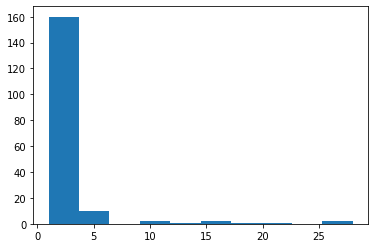

In [1039]:
plt.figure(figsize=(6, 4))
plt.hist([v for k,v in nx.degree(N)])

(array([ 21., 107.,  23.,  20.,   0.,   4.,   3.,   0.,   0.,   1.]),
 array([0.        , 0.00337079, 0.00674157, 0.01011236, 0.01348315,
        0.01685393, 0.02022472, 0.02359551, 0.02696629, 0.03033708,
        0.03370787]),
 <BarContainer object of 10 artists>)

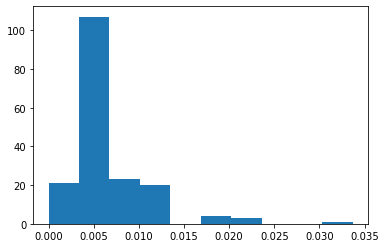

In [1040]:
plt.figure(figsize=(6, 4))
plt.hist(nx.centrality.closeness_centrality(G).values())

In [1054]:
#Q = nx.Graph()
def makeInfluencer(data):
    influenceFans = {}
    for i, j in data.iterrows(): 
        if j.influencer_name not in influenceFans:
            influenceFans[j.influencer_name] = []
            influenceFans[j.influencer_name].append(j.follower_name)
        else:
            influenceFans[j.influencer_name].append(j.follower_name)

    influenceCount = {}
    topInfluencers = []
    for key, val in influenceFans.items():
        influenceCount[key] = len(val)
        topInfluencers.append(key)

    topInfluencers = sorted(topInfluencers, key = lambda x: influenceCount[x], reverse=True)

    topFive = topInfluencers[:20]

    topFiveDict = {}
    for person in topFive:
        print(str(person) + " | " + str(influenceCount[person]))
        #print()
        # Key: influence, Value: FanCount, [Fan Names]
        topFiveDict[person] = [influenceCount[person], influenceFans[person]]
    return topFiveDict

In [1055]:
genres = ["Pop/Rock", "Electronic", "Country", "Reggae", "R&B;"]
influencerData = {}
for genre in genres:
    print()
    print(genre)
    popRockData = influence_data.loc[influence_data["influencer_main_genre"]== genre]
    influencerData[genre] = makeInfluencer(popRockData)


Pop/Rock
The Beatles | 615
Bob Dylan | 389
The Rolling Stones | 319
David Bowie | 238
Led Zeppelin | 221
Jimi Hendrix | 201
The Kinks | 192
The Beach Boys | 186
The Velvet Underground | 181
Black Sabbath | 171
Elvis Presley | 166
Chuck Berry | 159
The Byrds | 158
Sex Pistols | 153
The Who | 149
Neil Young | 148
Pink Floyd | 142
The Clash | 136
Brian Eno | 135
Ramones | 127

Electronic
Kraftwerk | 108
Tangerine Dream | 34
Massive Attack | 32
Neu! | 29
Daft Punk | 26
Aphex Twin | 24
808 State | 22
The Chemical Brothers | 19
DJ Shadow | 18
Yellow Magic Orchestra | 14
Vangelis | 13
Air | 13
Tricky | 12
Boards of Canada | 12
Underworld | 11
Frankie Knuckles | 10
Yello | 10
Fatboy Slim | 10
Popol Vuh | 9
Morcheeba | 9

Country
Hank Williams | 184
Johnny Cash | 112
Merle Haggard | 100
George Jones | 77
Willie Nelson | 66
Bill Monroe | 59
Ernest Tubb | 52
Waylon Jennings | 50
Patsy Cline | 50
Roy Acuff | 50
Dolly Parton | 49
Loretta Lynn | 47
George Strait | 47
Buck Owens | 42
Chet Atkins | 4

In [1043]:
#influence_data = pd.read_csv('influence_data.csv')

In [1057]:
def otherS(artist, genre):
    total = []
    current = []
    mostCommon = []
    for nowArtist in influencerData[genre].keys():
        current = []
        if nowArtist == artist:
            continue
        for fan in influencerData[genre][nowArtist][1]:
            if fan not in total:
                current.append(fan)
        if(len(current) > 5):
            mostCommon.append(nowArtist)
        for i in current:
            total.append(i)
    return total, mostCommon

In [1058]:
def createGraph(genre):
    numSimilar = {}
    for artist in influencerData[genre].keys():
        numSimilar[artist] = 0
        for fan in influencerData[genre][artist][1]:
            otherFans, mostCommon = otherS(artist, genre)
            if fan in otherFans:
                numSimilar[artist] += 1

        influencerData[genre][artist].append(numSimilar[artist])
        influencerData[genre][artist].append(mostCommon)

    artist = df.from_dict(influencerData[genre], orient = "index")
    artist.columns = ["Count", "Names", "NumSimilar", "MostCommon"]
    artist

    nodes = []
    edgeArtist = []

    artistList = list(influencerData[genre].keys())

    for artist in artistList:
        if artist not in nodes:
            nodes.append(str(artist))

    #print(nodes)

    node_sizes = {}
    for n in nodes:
        node_sizes[n] = influencerData[genre][artistList[artistList.index(n)]][0]
    #print node_sizes
    print(node_sizes)

    edges = [i for i in nodes[:-1] ]
    #print(edges)

    nodes2 = []
    sizes = []
    #for k in node_sizes.keys():
            #nodes2.append(k)

    g = nx.Graph()

    for v in node_sizes.values():
        sizes.append(v*5)

    for i in edges:
        for k in influencerData[genre][artistList[artistList.index(i)]][3]:
            g.add_edge(i, artistList[artistList.index(k)], weight=7, capacity=15, length=10)

    g.add_nodes_from(nodes)
    #g.add_edges_from(edges)

    nx.draw_random(g, node_size = sizes, with_labels=True) 
    plt.title("Influencer " + str(genre))
    plt.figure(figsize=(8, 8))
    plt.show()
    
    plt.figure(figsize=(6, 4))
    plt.hist([v for k,v in nx.degree(g)])
    
    plt.figure(figsize=(6, 4))
    plt.hist(nx.centrality.closeness_centrality(g).values())

{'The Beatles': 615, 'Bob Dylan': 389, 'The Rolling Stones': 319, 'David Bowie': 238, 'Led Zeppelin': 221, 'Jimi Hendrix': 201, 'The Kinks': 192, 'The Beach Boys': 186, 'The Velvet Underground': 181, 'Black Sabbath': 171, 'Elvis Presley': 166, 'Chuck Berry': 159, 'The Byrds': 158, 'Sex Pistols': 153, 'The Who': 149, 'Neil Young': 148, 'Pink Floyd': 142, 'The Clash': 136, 'Brian Eno': 135, 'Ramones': 127}


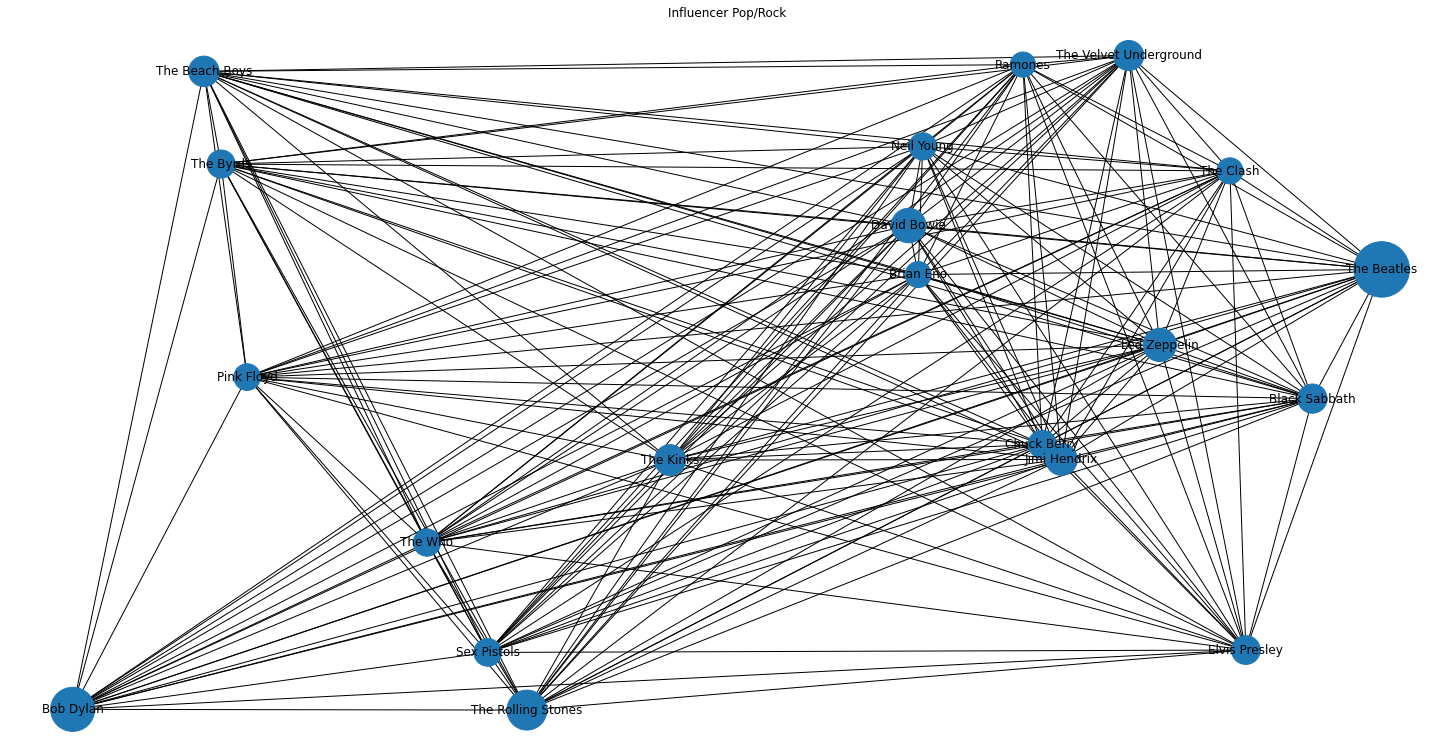

<Figure size 576x576 with 0 Axes>

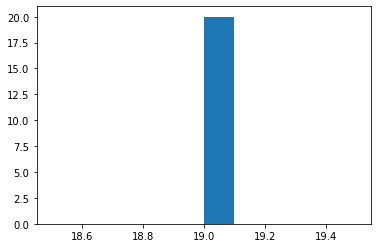

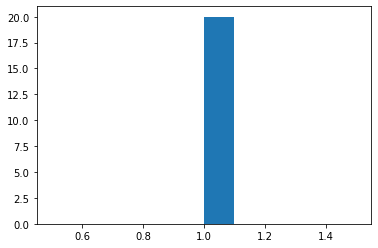

In [1059]:
createGraph("Pop/Rock")

{'Kraftwerk': 108, 'Tangerine Dream': 34, 'Massive Attack': 32, 'Neu!': 29, 'Daft Punk': 26, 'Aphex Twin': 24, '808 State': 22, 'The Chemical Brothers': 19, 'DJ Shadow': 18, 'Yellow Magic Orchestra': 14, 'Vangelis': 13, 'Air': 13, 'Tricky': 12, 'Boards of Canada': 12, 'Underworld': 11, 'Frankie Knuckles': 10, 'Yello': 10, 'Fatboy Slim': 10, 'Popol Vuh': 9, 'Morcheeba': 9}


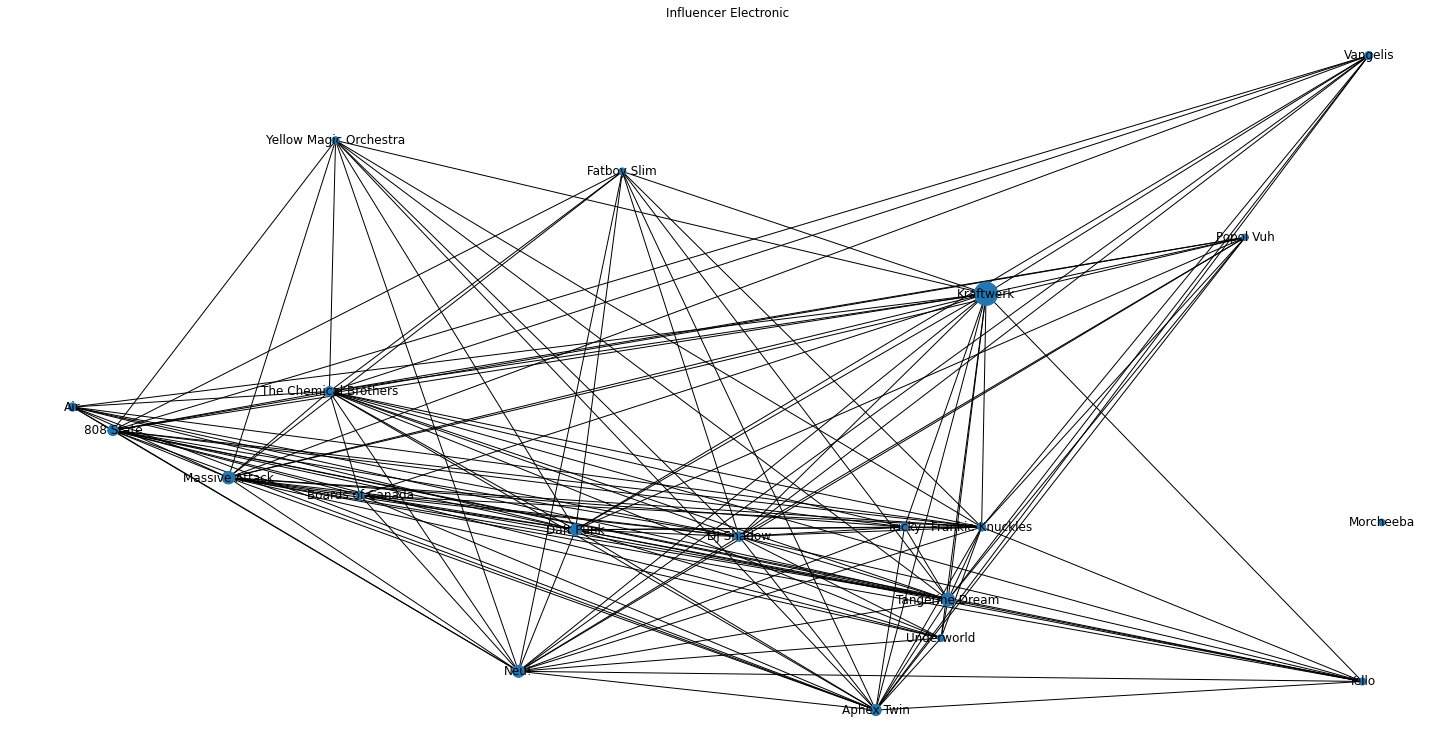

<Figure size 576x576 with 0 Axes>

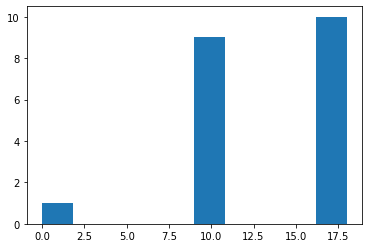

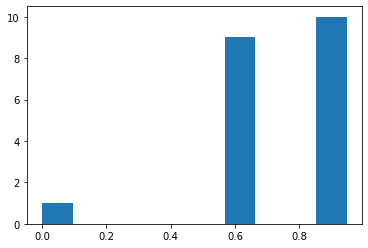

In [1060]:
createGraph("Electronic")

{'Hank Williams': 184, 'Johnny Cash': 112, 'Merle Haggard': 100, 'George Jones': 77, 'Willie Nelson': 66, 'Bill Monroe': 59, 'Ernest Tubb': 52, 'Waylon Jennings': 50, 'Patsy Cline': 50, 'Roy Acuff': 50, 'Dolly Parton': 49, 'Loretta Lynn': 47, 'George Strait': 47, 'Buck Owens': 42, 'Chet Atkins': 42, 'Bob Wills': 40, 'Emmylou Harris': 39, 'Garth Brooks': 38, 'Lefty Frizzell': 36, 'Randy Travis': 35}


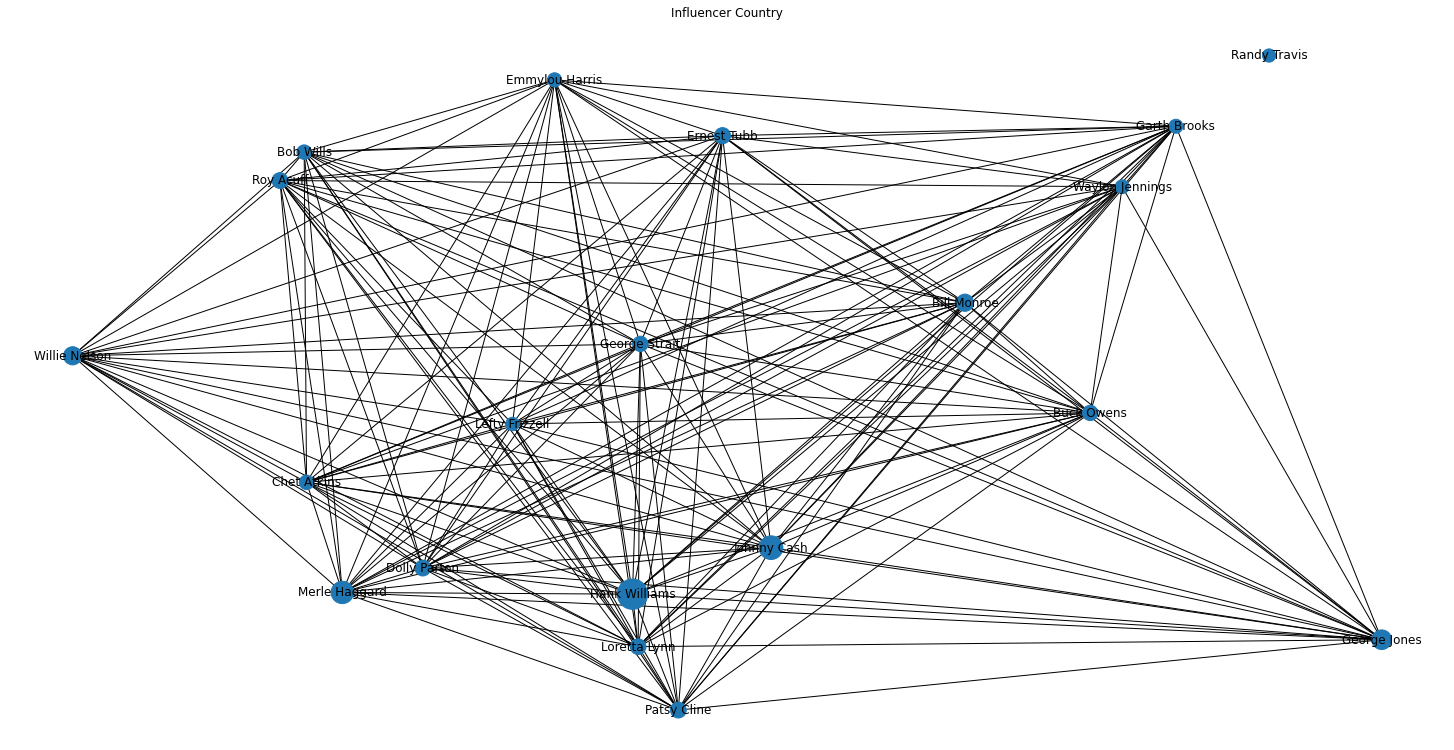

<Figure size 576x576 with 0 Axes>

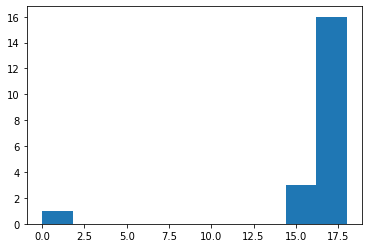

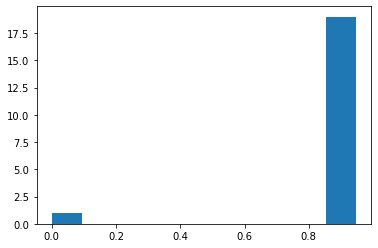

In [1061]:
createGraph("Country")

{'Lee "Scratch" Perry': 48, 'Jimmy Cliff': 35, 'Peter Tosh': 35, 'Toots & the Maytals': 33, 'The Skatalites': 29, 'King Tubby': 26, 'U-Roy': 24, 'Desmond Dekker': 22, 'Gregory Isaacs': 20, 'John Holt': 19, 'Sly & Robbie': 18, 'Bunny Wailer': 17, 'Prince Buster': 17, 'Ken Boothe': 16, 'Alton Ellis': 16, 'Aswad': 15, 'Burning Spear': 15, 'Dennis Brown': 15, 'Horace Andy': 14, 'The Wailers': 14}


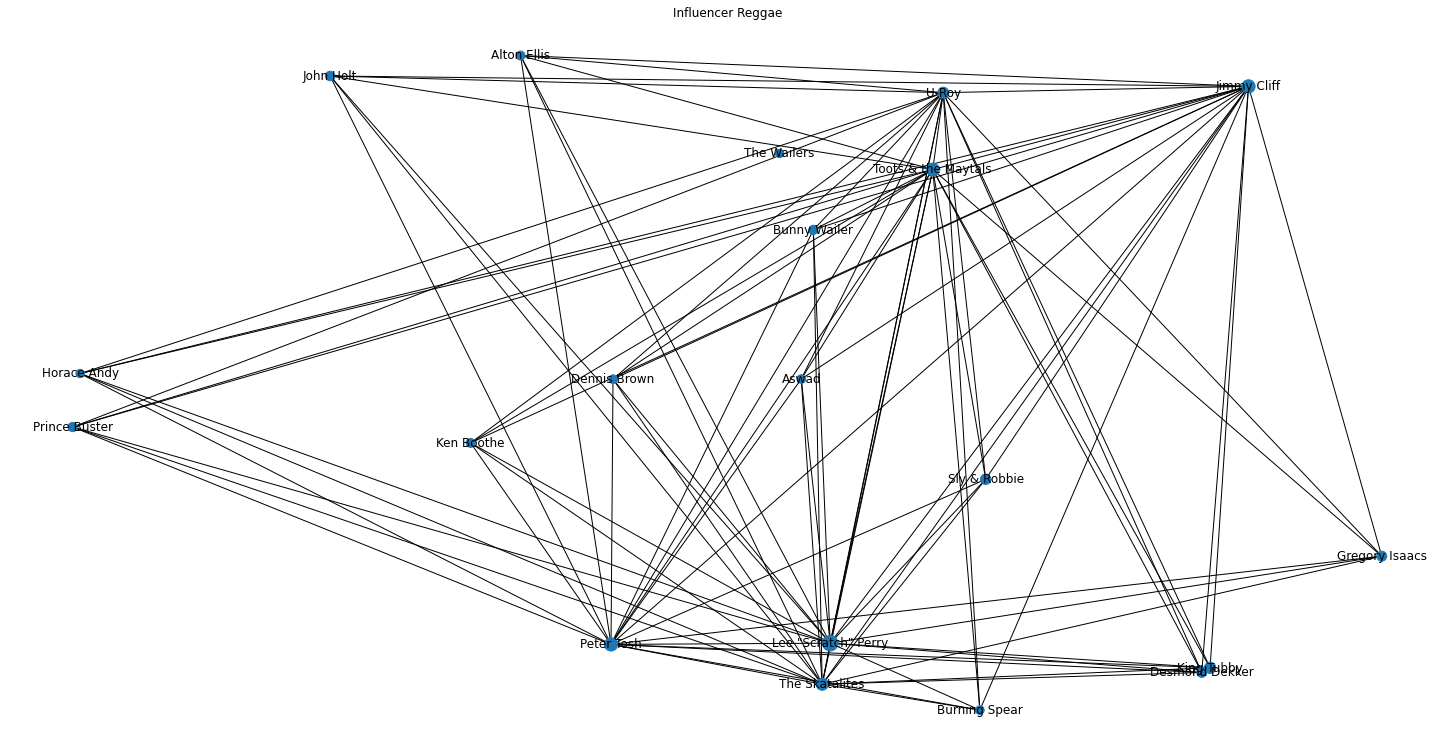

<Figure size 576x576 with 0 Axes>

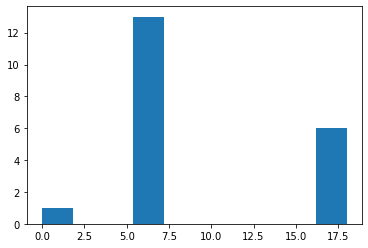

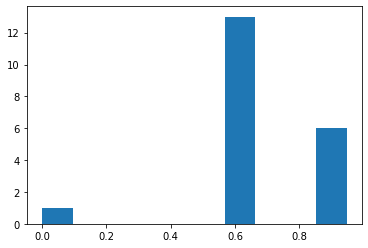

In [1062]:
createGraph("Reggae")

{'Marvin Gaye': 169, 'James Brown': 154, 'Stevie Wonder': 138, 'Sam Cooke': 128, 'Ray Charles': 113, 'Michael Jackson': 101, 'Otis Redding': 99, 'Aretha Franklin': 95, 'Prince': 92, 'Smokey Robinson': 84, 'Al Green': 78, 'Curtis Mayfield': 73, 'Sly & the Family Stone': 67, 'Janet Jackson': 59, 'The Temptations': 55, 'Jackie Wilson': 54, 'Diana Ross': 52, 'Fats Domino': 51, 'Parliament': 48, 'The Drifters': 47}


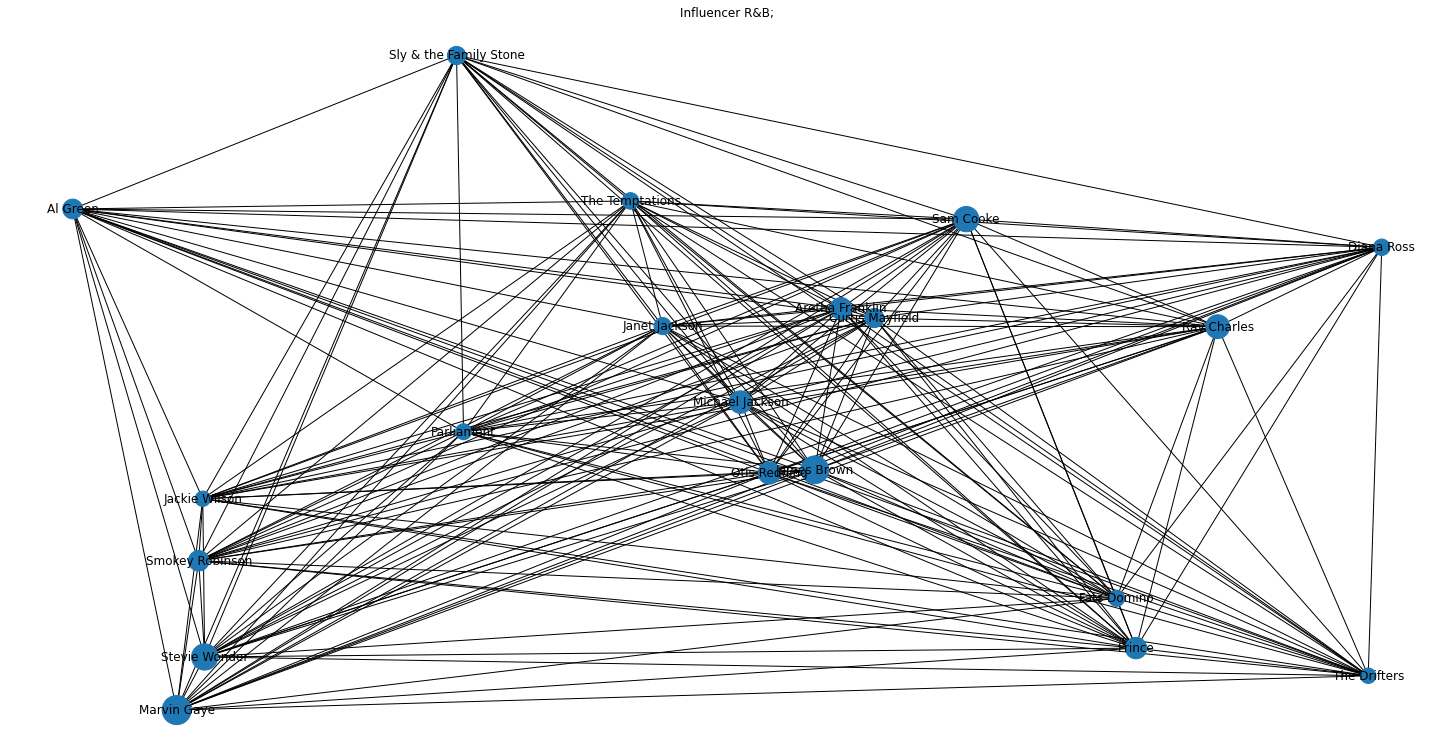

<Figure size 576x576 with 0 Axes>

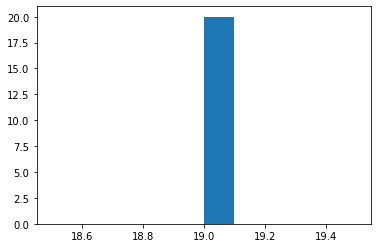

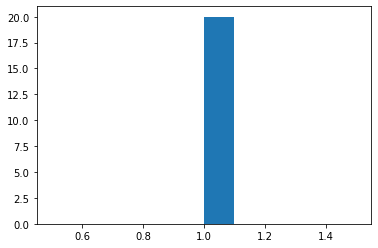

In [1063]:
createGraph("R&B;")